In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [295]:
df_roc = pd.read_csv('output/roc_auc.txt', sep=",", header=None)
df_roc.columns = ["Type","Value"]

df_roc["Type"] = df_roc["Type"].str.replace("ROC AUC","")
df_roc["Type"] = df_roc["Type"].str.strip()

df_dir = pd.read_csv('output/roc_auc_dir.txt', sep=",", header=None)
df_dir.columns = ["Type","Value"]

df_dir["Type"] = df_dir["Type"].str.replace("ROC AUC","")
df_dir["Type"] = df_dir["Type"].str.strip()

In [296]:
df_roc = df_roc[df_roc["Type"] != "GATv2"]

df_dir = df_dir[~ df_dir["Type"].isin(["GATv2","node2vec"])]

In [297]:
df_roc.loc[df_roc["Type"] == "ACAGE woAtt", "Type"] = "ACAGE MLP"
df_roc.loc[df_roc["Type"] == "train", "Type"] = "ACAGE"
df_roc.loc[df_roc["Type"] == "GAT", "Type"] = "GAE"
df_roc.loc[df_roc["Type"] == "ACAGE wAtt", "Type"] = "ACAGE ATT"

df_dir.loc[df_dir["Type"] == "ACAGE woAtt", "Type"] = "ACAGE MLP"
df_dir.loc[df_dir["Type"] == "train", "Type"] = "ACAGE"
df_dir.loc[df_dir["Type"] == "GAT", "Type"] = "GAE"
df_dir.loc[df_dir["Type"] == "ACAGE wAtt", "Type"] = "ACAGE ATT"

In [298]:
palette = {
    'ACAGE': 'tab:blue',
    'ACAGE MLP': 'tab:purple',
    'node2vec': 'tab:green',
    'GAE': 'tab:red',
    'ACAGE ATT': 'tab:brown'
    #'GATv2' : 'tab:orange'
}

In [299]:
df_roc["Index"] = [1,10,50,100,150,200,500,1000,1500,2000]*5
df_roc["Index"] = df_roc["Index"].astype("str")

df_dir["Index"] = [1,10,50,100,150,200,500,1000,1500,2000]*4
df_dir["Index"] = df_dir["Index"].astype("str")

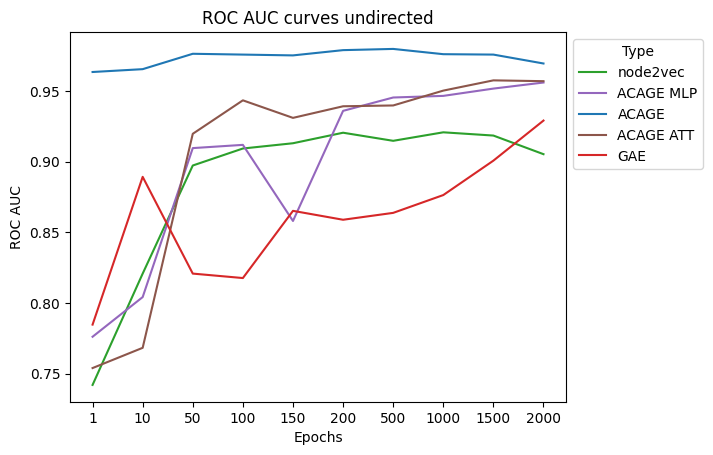

In [300]:
ax = sns.lineplot(x = "Index",y='Value', hue='Type', data= df_roc, palette = palette)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("ROC AUC curves undirected")
plt.xlabel("Epochs")
plt.ylabel("ROC AUC")
plt.savefig("output/roc_auc", bbox_inches = "tight", dpi = 300)
plt.show()

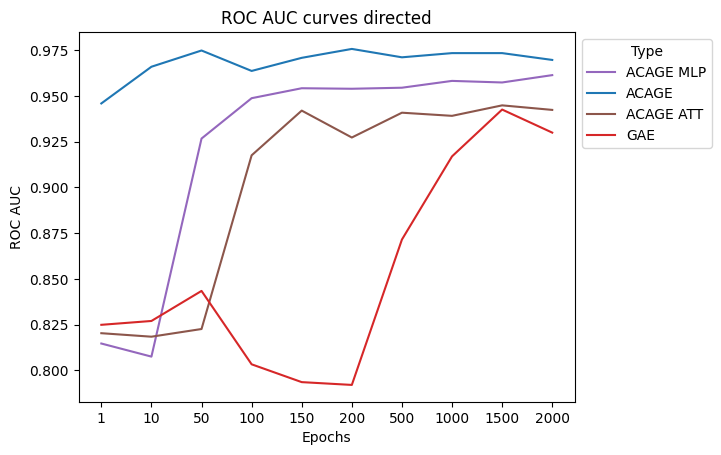

In [301]:
ax = sns.lineplot(x = "Index",y='Value', hue='Type', data= df_dir, palette = palette)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title("ROC AUC curves directed")
plt.xlabel("Epochs")
plt.ylabel("ROC AUC")
plt.savefig("output/roc_auc_dir", bbox_inches = "tight", dpi = 300)
plt.show()